In [2]:
genera_counts.columns
metadata.columns

Index(['Dataset', 'Sample', 'Subject', 'Study.Group', 'Gender', 'DOI',
       'Publication.Name', 'consent_age', 'Age.Units', 'site_sub_coll',
       'ProjectSpecificID', 'week_num', 'date_of_receipt', 'interval_days',
       'visit_num', 'site_name', 'Age at diagnosis', 'Antibiotics', 'race',
       'fecalcal', 'BMI_at_baseline', 'Height_at_baseline',
       'Weight_at_baseline', 'smoking status'],
      dtype='object')

Let's look at the Study_groups

In [3]:
y = metadata['Study.Group']
y

0      CD
1      CD
2      UC
3      UC
4      UC
       ..
377    UC
378    UC
379    UC
380    UC
381    UC
Name: Study.Group, Length: 382, dtype: object

Let's check their missing values.

In [4]:
# Check for missing values in Study.Group
missing_study_group = metadata['Study.Group'].isnull().sum()
print(f"Missing values in Study.Group: {missing_study_group}")
# Check for missing values in genera_counts
missing_genera_counts = genera_counts.isnull().sum().sum()
print(f"Total missing values in Genera Counts: {missing_genera_counts}")

Missing values in Study.Group: 0
Total missing values in Genera Counts: 0


In Study Groups and Genera_counts, there are no missing values. Let's do the same in Genera_counts:

In [5]:
genera_counts


,Sample,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,MSM5LLDS,0,25,0,0,53,12,158,0,145,...,0,0,0,0,0,0,0,0,0,0
1,ESM5MEBE,0,25,21,0,155,0,470,0,19,...,0,0,0,0,0,0,0,0,0,0
2,MSM6J2IQ,0,93,58,0,346,0,446,0,36,...,0,0,0,0,0,0,0,0,0,0
3,HSM5MD62,0,44,18,0,181,0,183,0,20,...,0,0,0,0,0,0,0,0,0,0
4,HSM5MD5D,0,51,539,0,456,0,2774,0,3657,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MSMB4LYH,0,94,242,0,399,20,570,0,23432,...,0,0,0,0,0,0,0,0,0,0
378,PSMB4MC5,0,281,73,0,362,17,878,0,1725,...,0,0,0,0,0,0,0,0,0,0
379,HSMA33RX,0,20,68,0,223,0,796,0,152,...,0,0,0,0,0,0,0,0,0,0
380,MSMB4LYB,0,22,0,0,76,13,615,0,0,...,0,0,0,0,0,0,0,0,0,0


First we select on the top 1000 bacteriae with their respectively higlhy total bacteriae-counts: We summed per bacteriae_group the values of each 382 samples to reach the 1000 bacteria with the highest sums. 

In [35]:
# Compute the sum for each column (bacterium)
column_sums = genera_counts.sum(axis=0)

# Convert the result into a new DataFrame
column_sums_df = column_sums.reset_index()
column_sums_df.columns = ['Bacterium', 'Sum']

# Display the new DataFrame
column_sums_df
column_sums_df['Sum'] = pd.to_numeric(column_sums_df['Sum'], errors='coerce')

# Sort the DataFrame by the 'Sum' column in descending order and select the top 100
column_sums_df = column_sums_df.dropna(subset=['Sum'])
top_1000_bacteria = column_sums_df.sort_values(by='Sum', ascending=False).head(1000)
# Display the top 100
print(top_1000_bacteria)

                                              Bacterium           Sum
1116  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...  1.590377e+09
213   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...  1.229194e+09
1222  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  3.824554e+08
1670  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...  3.233708e+08
644   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...  1.977750e+08
...                                                 ...           ...
844   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...  1.596000e+04
1292  d__Bacteria;p__Proteobacteria;c__Gammaproteoba...  1.595600e+04
1851  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...  1.595000e+04
1422  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__S...  1.592100e+04
1672  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...  1.591600e+04

[1000 rows x 2 columns]


Those are the top 1000 bacteriae_groups with the highest counts of values. These could be used for end-checking. Let's sum up all those 1000 bacteriae. 

In [38]:
# Assuming top_1000_bacteria_groups was previously created as a DataFrame
top_1000_bacteria_list = top_1000_bacteria['Bacterium'].tolist()
top_1000_bacteria_list[0:10]

['d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides',
 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium',
 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella',
 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes',
 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Tannerellaceae;g__Parabacteroides',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Agathobacter',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Roseburia',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Enterocloster',
 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia']

We re-add their resepectively Sample-variable 

In [8]:
# Step 1: Filter genera_counts for the top 1000 bacteria groups
filtered_genera_counts = genera_counts[['Sample'] + top_1000_bacteria_list]
# Validate top_100_bacteria_list against the columns of genera_counts
valid_columns = ['Sample'] + [col for col in top_1000_bacteria_list if col in genera_counts.columns]
# Filter using only valid columns
filtered_genera_counts = genera_counts[valid_columns]
filtered_genera_counts

,Sample,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Tannerellaceae;g__Parabacteroides,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Agathobacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Roseburia,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Enterocloster,...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__UBA932;g__RGIG6374,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Lentimicrobiaceae;g__Lentimicrobium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__UBA4717,d__Bacteria;p__Firmicutes_F;c__Halanaerobiia;o__B1SED10-174;f__B1SED10-174;g__T1SED10-26,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__RGIG4034,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA6987,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Massilia,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Schneewindia,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Saccharofermentanales;f__Saccharofermentanaceae;g__Firm-16,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__RGIG423
0,MSM5LLDS,5576124,85591,188899,32280,353162,545837,26241,1084,10344,...,0,0,0,49,0,16,27,0,0,0
1,ESM5MEBE,8415016,6977728,1084475,68749,555072,1072640,591226,582705,165304,...,0,21,0,0,10,31,31,30,23,52
2,MSM6J2IQ,7015199,7832984,4856325,57978,26190,111881,742570,529670,55791,...,0,0,0,28,20,59,78,0,85,161
3,HSM5MD62,10848842,5764145,1141163,48706,393351,754183,4104,95748,29871,...,0,28,0,321,10,45,32,0,51,0
4,HSM5MD5D,1969154,2328783,2387274,33196,834809,1153115,396661,28472,79002,...,0,21,28,36,27,75,94,333,42,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MSMB4LYH,1098377,2690218,2338969,539914,603069,487935,551457,179212,53360,...,0,20,13,0,89,76,66,280,64,84
378,PSMB4MC5,2253810,1413924,1784032,28802,180273,199755,347253,56352,47504,...,0,29,58,91,92,75,42,0,81,46
379,HSMA33RX,942386,3504215,1580091,15334,22649,184591,841724,618586,51026,...,0,0,11,99,12,50,45,0,30,30
380,MSMB4LYB,11528072,3368122,806247,4767223,334919,1024033,37837,22509,108082,...,10,52,0,35,20,0,30,0,19,10


Now the two datasets with the representable variables *Study.Group*, *Sample* ad their top 1000 *Bacteriae_groups* are merged. However, those filtered_genera_counts with the top 1000 most common bacteriae might have the highest diversity which might bias our interpretation. We decided to use the genera_count with all bacteriae_families, inclusively the other 8696 bacteriae_families. This should ensure us the highest accuracy when predicting IBD/ No IBD. SO we merge the whole dataset Genera_counts with their respectively Study Group wchich we change into two groups: IBD (with CD and UC) and No IBD (with no_IBD).

In [9]:

# Step 3: Merge with metadata to include 'Study.Group'
merged_df = genera_counts.merge(metadata[['Sample', 'Study.Group']], on='Sample')

merged_df['IBD_Status'] = merged_df['Study.Group'].apply(lambda x: 'IBD' if x in ['CD', 'UC'] else 'No IBD')

# Display the final DataFrame
merged_df


,Sample,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,...,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus,Study.Group,IBD_Status
0,MSM5LLDS,0,25,0,0,53,12,158,0,145,...,0,0,0,0,0,0,0,0,CD,IBD
1,ESM5MEBE,0,25,21,0,155,0,470,0,19,...,0,0,0,0,0,0,0,0,CD,IBD
2,MSM6J2IQ,0,93,58,0,346,0,446,0,36,...,0,0,0,0,0,0,0,0,CD,IBD
3,HSM5MD62,0,44,18,0,181,0,183,0,20,...,0,0,0,0,0,0,0,0,CD,IBD
4,HSM5MD5D,0,51,539,0,456,0,2774,0,3657,...,0,0,0,0,0,0,0,0,nonIBD,No IBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MSMB4LYH,0,94,242,0,399,20,570,0,23432,...,0,0,0,0,0,0,0,0,UC,IBD
378,PSMB4MC5,0,281,73,0,362,17,878,0,1725,...,0,0,0,0,0,0,0,0,UC,IBD
379,HSMA33RX,0,20,68,0,223,0,796,0,152,...,0,0,0,0,0,0,0,0,UC,IBD
380,MSMB4LYB,0,22,0,0,76,13,615,0,0,...,0,0,0,0,0,0,0,0,CD,IBD


Now we have the definitve dataset, we start pre-processing.

First importing train/test-split as wel as possible standardisation function:

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Define features (bacterial families in gerea_counts) and target (Study.Group)

In [11]:
bacterial_features = [col for col in merged_df.columns if col not in ['Sample', 'IBD_status']]
X = genera_counts  # Features
y = merged_df['IBD_Status']       # Target
y

0         IBD
1         IBD
2         IBD
3         IBD
4      No IBD
        ...  
377       IBD
378       IBD
379       IBD
380       IBD
381    No IBD
Name: IBD_Status, Length: 382, dtype: object

Define features (bacterial families) and target (Study.Group). The study groups have to be integers, so we give them a value:
IBD = 0,
NonIBD = 1

In [12]:

from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
y = Encoder.fit_transform(y)  # Converts categories into integers
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

Split data into training and test sets:

In [13]:
from sklearn.model_selection import train_test_split

# Assuming you have your full dataset X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Exclude the Sample column from X_train
X_train = X_train.drop(columns=['Sample'])
X_test = X_test.drop(columns=['Sample'])
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



Training set size: (305, 9694)
Test set size: (77, 9694)


Show a first plot without any standardization nor logaritmisation

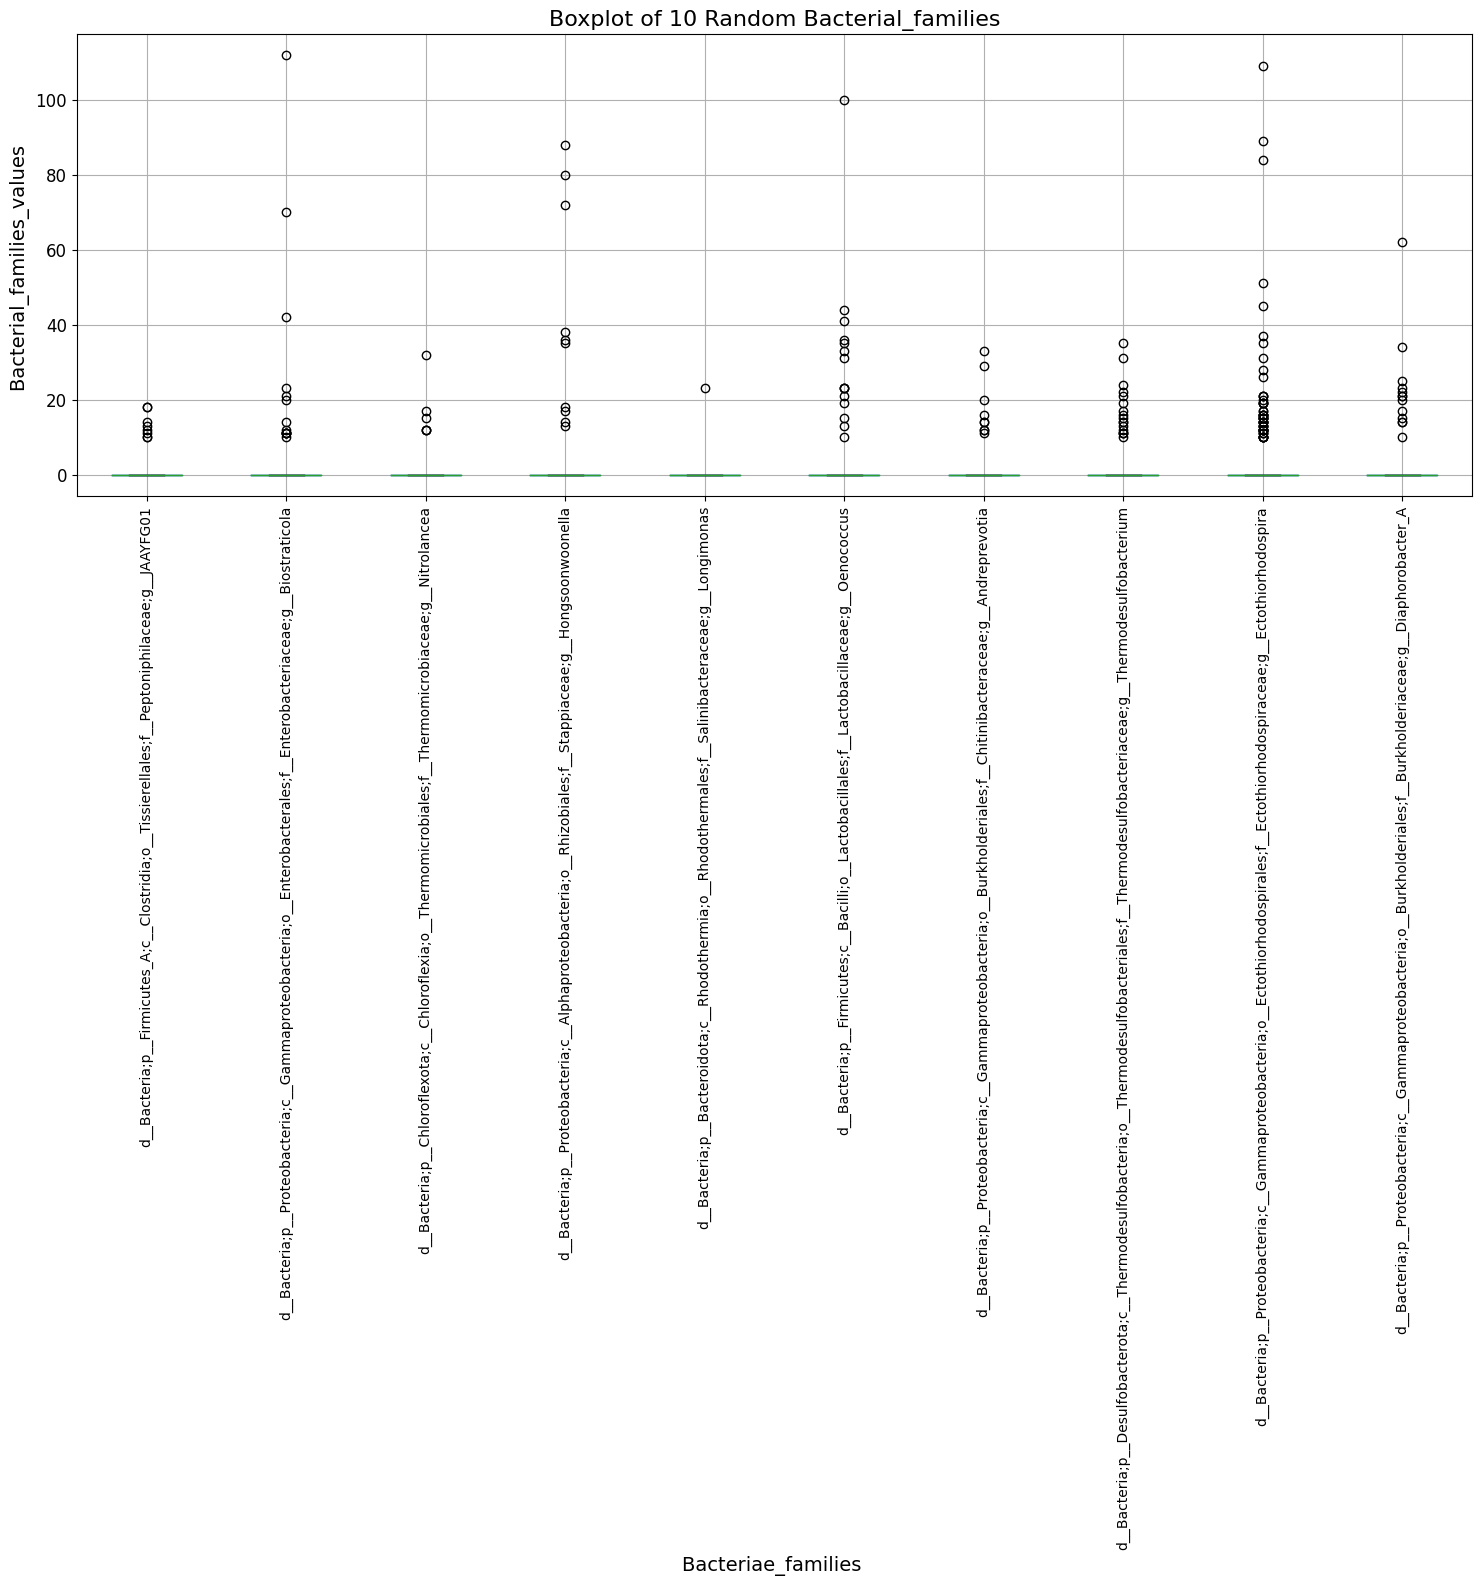

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6)) #set the size of the plot
X_train.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90) #rotate the gene names on the x-axis
plt.yticks(fontsize=12)

# Add labels and title
plt.title("Boxplot of 10 Random Bacterial_families", fontsize=16)
plt.xlabel("Bacteriae_families ", fontsize=14)
plt.ylabel("Bacterial_families_values ", fontsize=14)
plt.show()


There can be seen that the boxes are all low and some values are exponentially high outside those boxes, so the values could be logaritmised to handle zero's. 

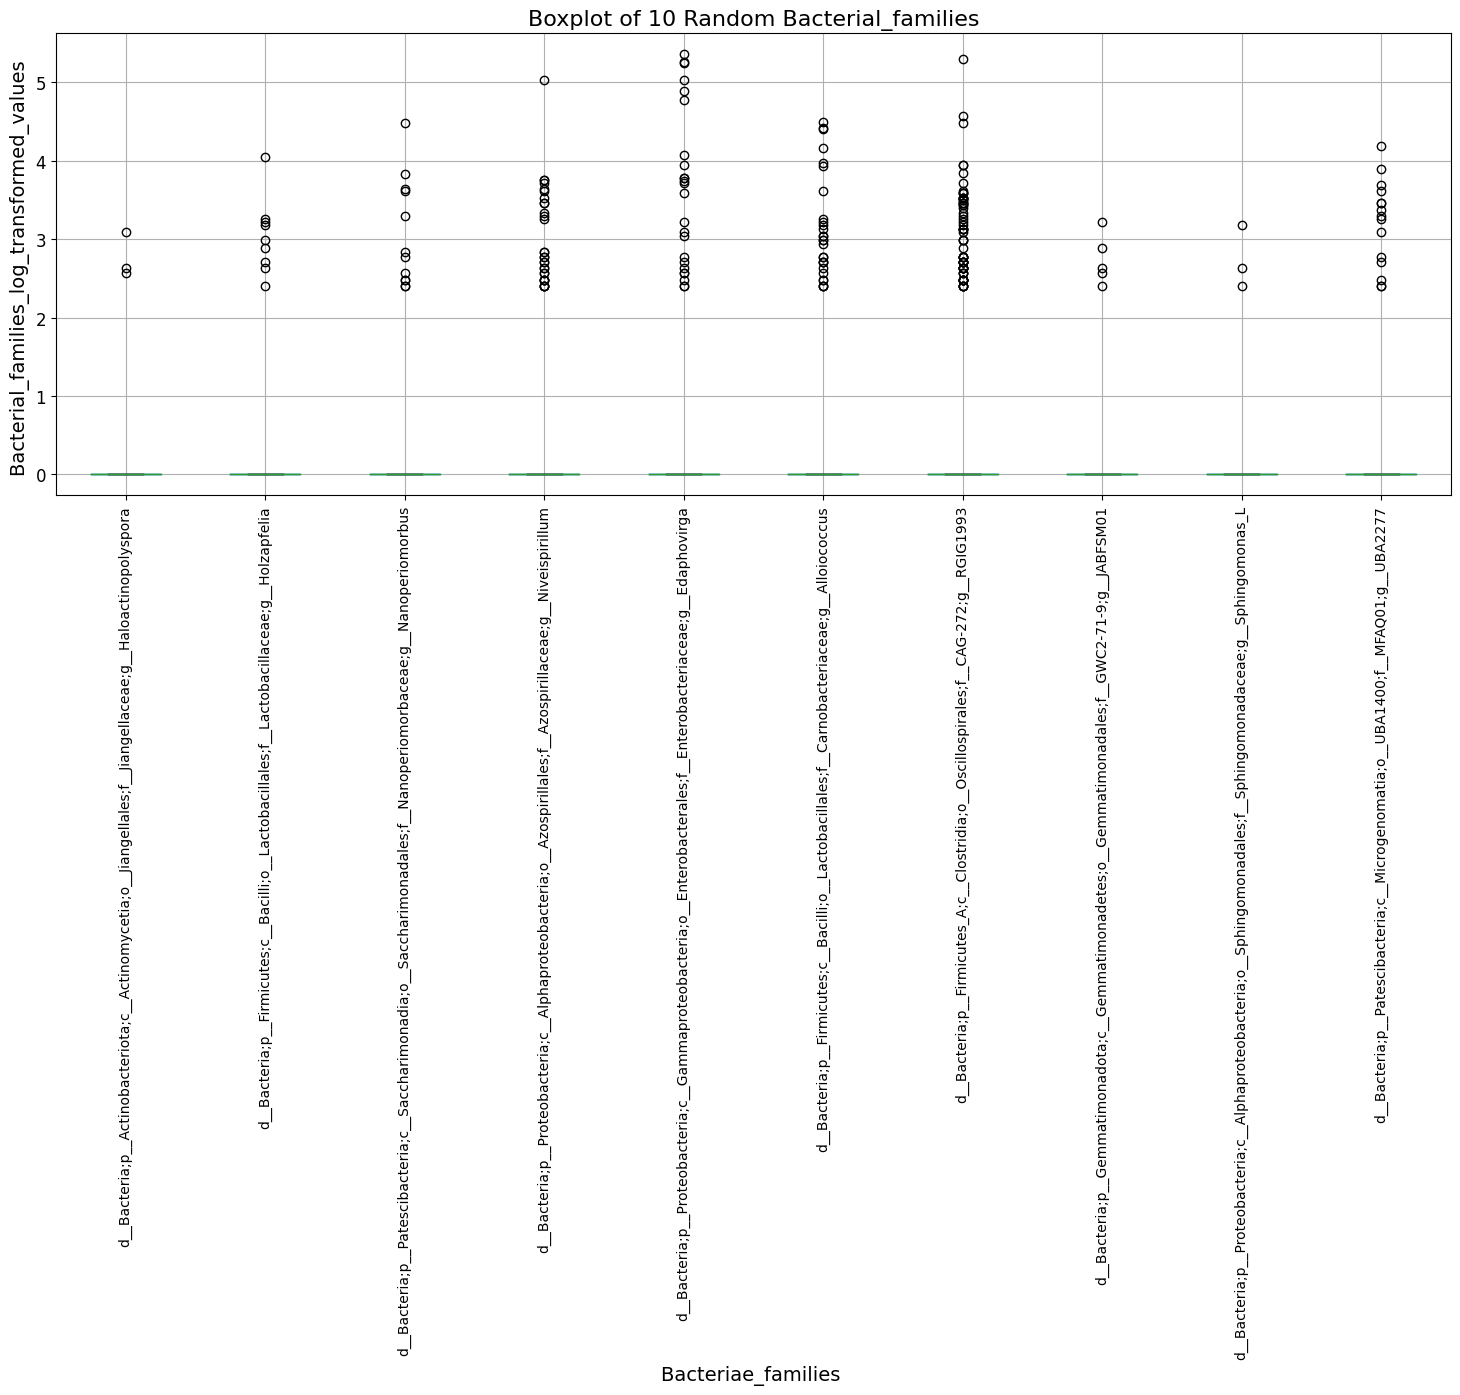

In [15]:
import numpy as np
X_train_log_transformed = np.log1p(X_train)  
X_test_log_transformed = np.log1p(X_test)

 # Log-transform to handle zeros
plt.figure(figsize=(18,6)) #set the size of the plot
X_train_log_transformed.sample(10, axis="columns").boxplot()
plt.xticks(rotation=90) #rotate the gene names on the x-axis
plt.yticks(fontsize=12)

# Add labels and title
plt.title("Boxplot of 10 Random Bacterial_families", fontsize=16)
plt.xlabel("Bacteriae_families ", fontsize=14)
plt.ylabel("Bacterial_families_log_transformed_values ", fontsize=14)
plt.show()


The logarithmized data now shows better control over extreme values (less spread compared to the original), making it more suitable for machine learning algorithms. However, the range of the features varies widely. So next step is Scaling
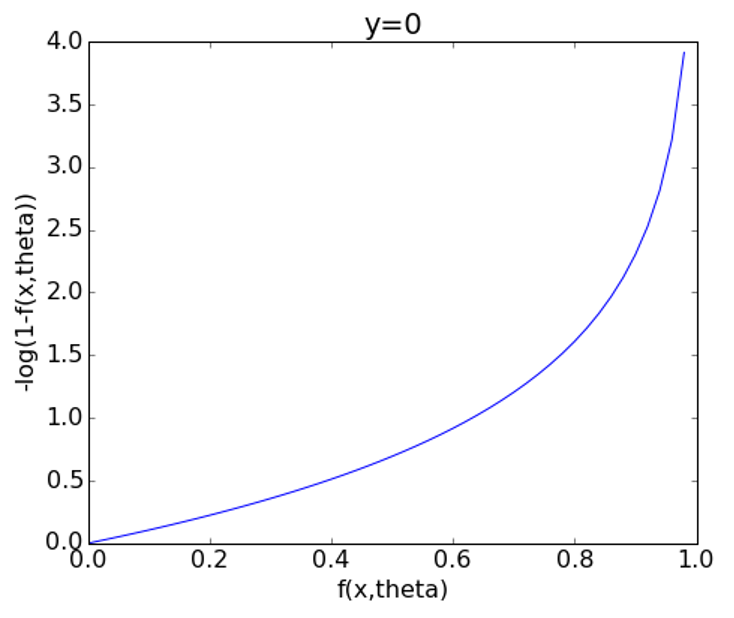

In [16]:
from sklearn.preprocessing import StandardScaler
common_columns = X_train_log_transformed.columns.intersection(X_test_log_transformed.columns)
# Ensure both train and test have the same columns
X_train_log_transformed = X_train_log_transformed[common_columns]
X_test_log_transformed = X_test_log_transformed[common_columns]
# Check if the columns match before scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_log_transformed)
X_test_scaled = scaler.transform(X_test_log_transformed)
X_train_scaled
X_test_scaled

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled


,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,-0.113214,1.813547,0.555214,-0.539333,0.205386,1.431392,0.344041,-0.080397,0.589712,0.840166,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
1,-0.113214,-1.630075,-2.217721,-0.539333,-4.159682,2.716201,-3.879315,-0.080397,-1.716588,0.929661,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
2,-0.113214,-1.630075,-2.217721,-0.539333,-1.864492,-0.674680,-0.750729,-0.080397,-0.556729,-0.957297,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
3,-0.113214,-0.392657,-0.544775,-0.539333,-0.291445,-0.674680,0.409469,-0.080397,-0.192979,0.929661,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
4,-0.113214,-0.260635,0.379802,1.635199,-0.057174,-0.674680,0.423835,-0.080397,-0.524080,-0.957297,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,-0.113214,-0.419136,0.497028,-0.539333,0.129876,-0.674680,-0.193011,-0.080397,0.752679,-0.957297,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
301,-0.113214,0.078517,-0.280714,1.635199,0.316455,-0.674680,-0.400975,-0.080397,1.079358,0.506522,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
302,-0.113214,-0.392657,0.045509,2.041775,-0.189655,-0.674680,-0.091341,-0.080397,-0.279959,-0.957297,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354
303,-0.113214,-0.029999,0.983417,2.285668,0.519533,0.959118,0.298202,-0.080397,0.206088,-0.957297,...,0.0,0.0,0.0,0.0,0.0,-0.057354,-0.057354,-0.057354,-0.057354,-0.057354


Re-plot the Standardised logaritmic values:

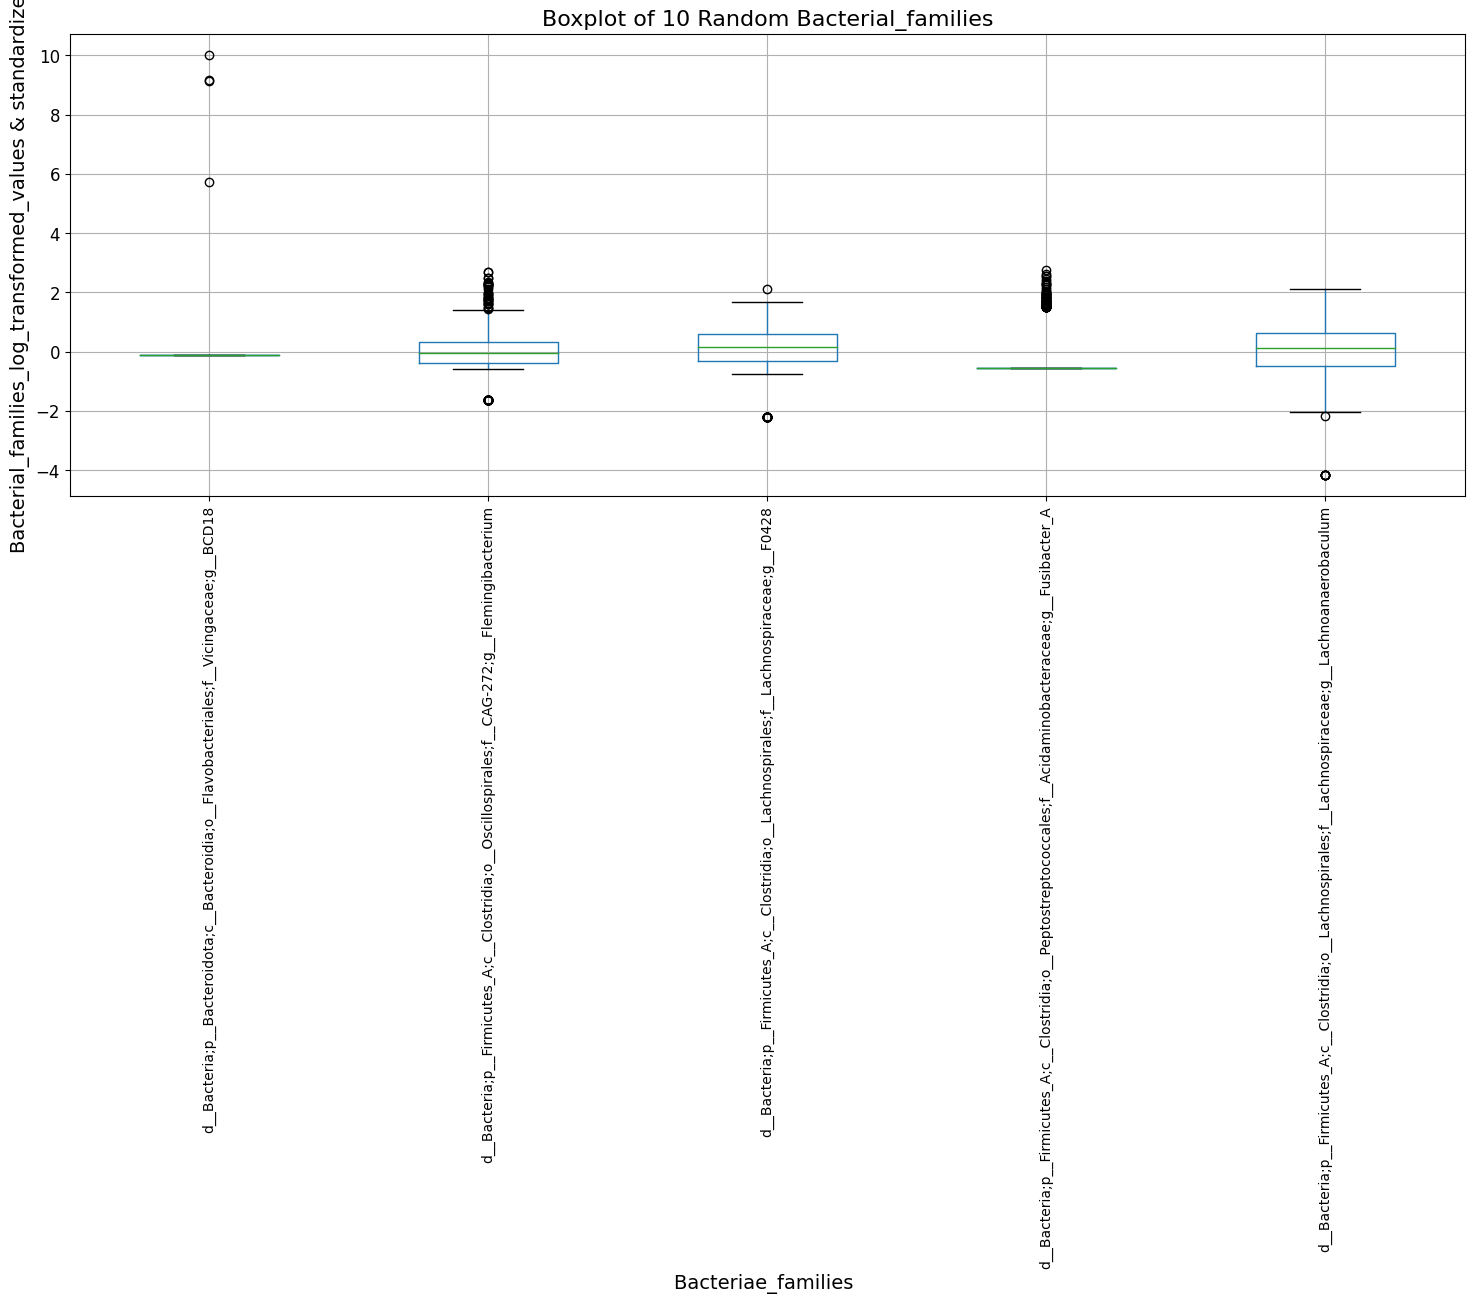

In [17]:
plt.figure(figsize=(18, 6))
X_train_scaled.iloc[:, :5].boxplot()  # Display only the first 5 columns
plt.xticks(rotation=90)
plt.yticks(fontsize=12)

# Add labels and title
plt.title("Boxplot of 10 Random Bacterial_families", fontsize=16)
plt.xlabel("Bacteriae_families ", fontsize=14)
plt.ylabel("Bacterial_families_log_transformed_values & standardized ", fontsize=14)
plt.show()



The wide_broath is much more simlar, this means the features have been scaled. Model training:a first possible approach to create a Machine Learning is by fitting a logistic regression model. 

In [18]:
X_train_scaled
y_train


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

Use the fitted model to compute predictions for the datapoints in the testset X_test_scaled. Write the predictions to predictions_scaled:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Initialize the model
cls_std = LogisticRegression(max_iter=1000, solver='lbfgs')
# Fit the model with the training data
cls_std.fit(X_train_scaled, y_train)  # X_train_scaled should be your scaled training features
X_train_logistic = pd.DataFrame(X_train_scaled, columns= X_train_scaled.columns)
print("X_train logistic regression values:", X_train_logistic.columns[:10])
# After fitting, you can predict on the test set
X_prediction_scaled = cls_std.predict(X_test_scaled)  # X_test_scaled should be your scaled test features
print("X_test predictions:" , X_prediction_scaled)


X_train logistic regression values: Index(['d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum',
       'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus',
       

This shows the predicted class label for each row in X_test_scaled. In theory, the logistic regression model computes class probabilities, not classes.
Applying the model with predict_proba() instead of predict() outputs these class probabilities.

In [20]:
X_pred_prob = cls_std.predict_proba(X_test_scaled) 
X_pred_prob

array([[6.05353321e-03, 9.93946467e-01],
       [9.99449444e-01, 5.50555856e-04],
       [7.64392904e-01, 2.35607096e-01],
       [9.81011853e-01, 1.89881473e-02],
       [9.76555802e-01, 2.34441983e-02],
       [9.93392569e-01, 6.60743082e-03],
       [9.89195504e-01, 1.08044959e-02],
       [9.87661835e-01, 1.23381648e-02],
       [9.68174325e-01, 3.18256748e-02],
       [8.94996270e-01, 1.05003730e-01],
       [9.99717507e-01, 2.82493146e-04],
       [9.99901671e-01, 9.83293982e-05],
       [9.99101459e-01, 8.98541067e-04],
       [9.99996799e-01, 3.20066517e-06],
       [9.98213775e-01, 1.78622537e-03],
       [2.79036062e-03, 9.97209639e-01],
       [9.99958892e-01, 4.11079880e-05],
       [8.44889111e-01, 1.55110889e-01],
       [9.99899054e-01, 1.00945895e-04],
       [3.32219802e-03, 9.96677802e-01],
       [9.99991116e-01, 8.88407591e-06],
       [9.99145822e-01, 8.54177748e-04],
       [9.99703472e-01, 2.96528057e-04],
       [9.99939337e-01, 6.06625540e-05],
       [9.960858

Notice that this computes two values (columns) for each datapoint (rows). These are the probability that the datapoint belongs to class IBD or class No IBD respectively.
Our model also has a function score() that computes the accuracy of the predictions:

In [21]:
print(classification_report(y_test, X_prediction_scaled))  # Classification report
print("Accuracy of scaled analysis: {}".format(cls_std.score(X_test_scaled, y_test)))  # Accuracy

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        57
           1       0.83      0.50      0.62        20

    accuracy                           0.84        77
   macro avg       0.84      0.73      0.76        77
weighted avg       0.84      0.84      0.83        77

Accuracy of scaled analysis: 0.8441558441558441


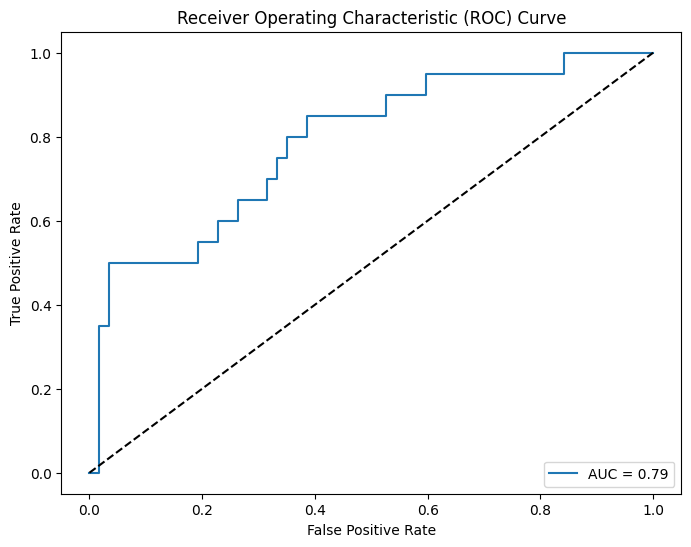

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, X_pred_prob[:, 1])

# Compute AUC score
auc = roc_auc_score(y_test, X_pred_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The Logistic Regression model gives an accuracy of only 84%, and the Area Under the ROC Curve (AUC) is not bad, namely 79%. Maybe the MinMax_Scaler might work as well:

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_train_minmax = pd.DataFrame(scaler_minmax.fit_transform(X_train_scaled), columns=X_train_scaled.columns)
X_test_minmax = pd.DataFrame(scaler_minmax.transform(X_test_scaled), columns=X_test_scaled.columns)
X_train_minmax

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,0.0,0.798652,0.637860,0.000000,0.695723,0.494722,0.696863,0.0,0.570082,0.406574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.796527,0.000000,0.0,0.000000,0.426817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.365817,0.000000,0.516223,0.0,0.286699,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.286984,0.384829,0.000000,0.616536,0.000000,0.707659,0.0,0.376613,0.426817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.317603,0.597510,0.662572,0.653875,0.000000,0.710029,0.0,0.294770,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.0,0.280844,0.624475,0.000000,0.683688,0.000000,0.608248,0.0,0.610365,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.396260,0.445571,0.662572,0.713426,0.000000,0.573934,0.0,0.691115,0.331106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.286984,0.520612,0.786454,0.632760,0.000000,0.625024,0.0,0.355113,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0.0,0.371093,0.736360,0.860768,0.745793,0.383783,0.689299,0.0,0.475256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


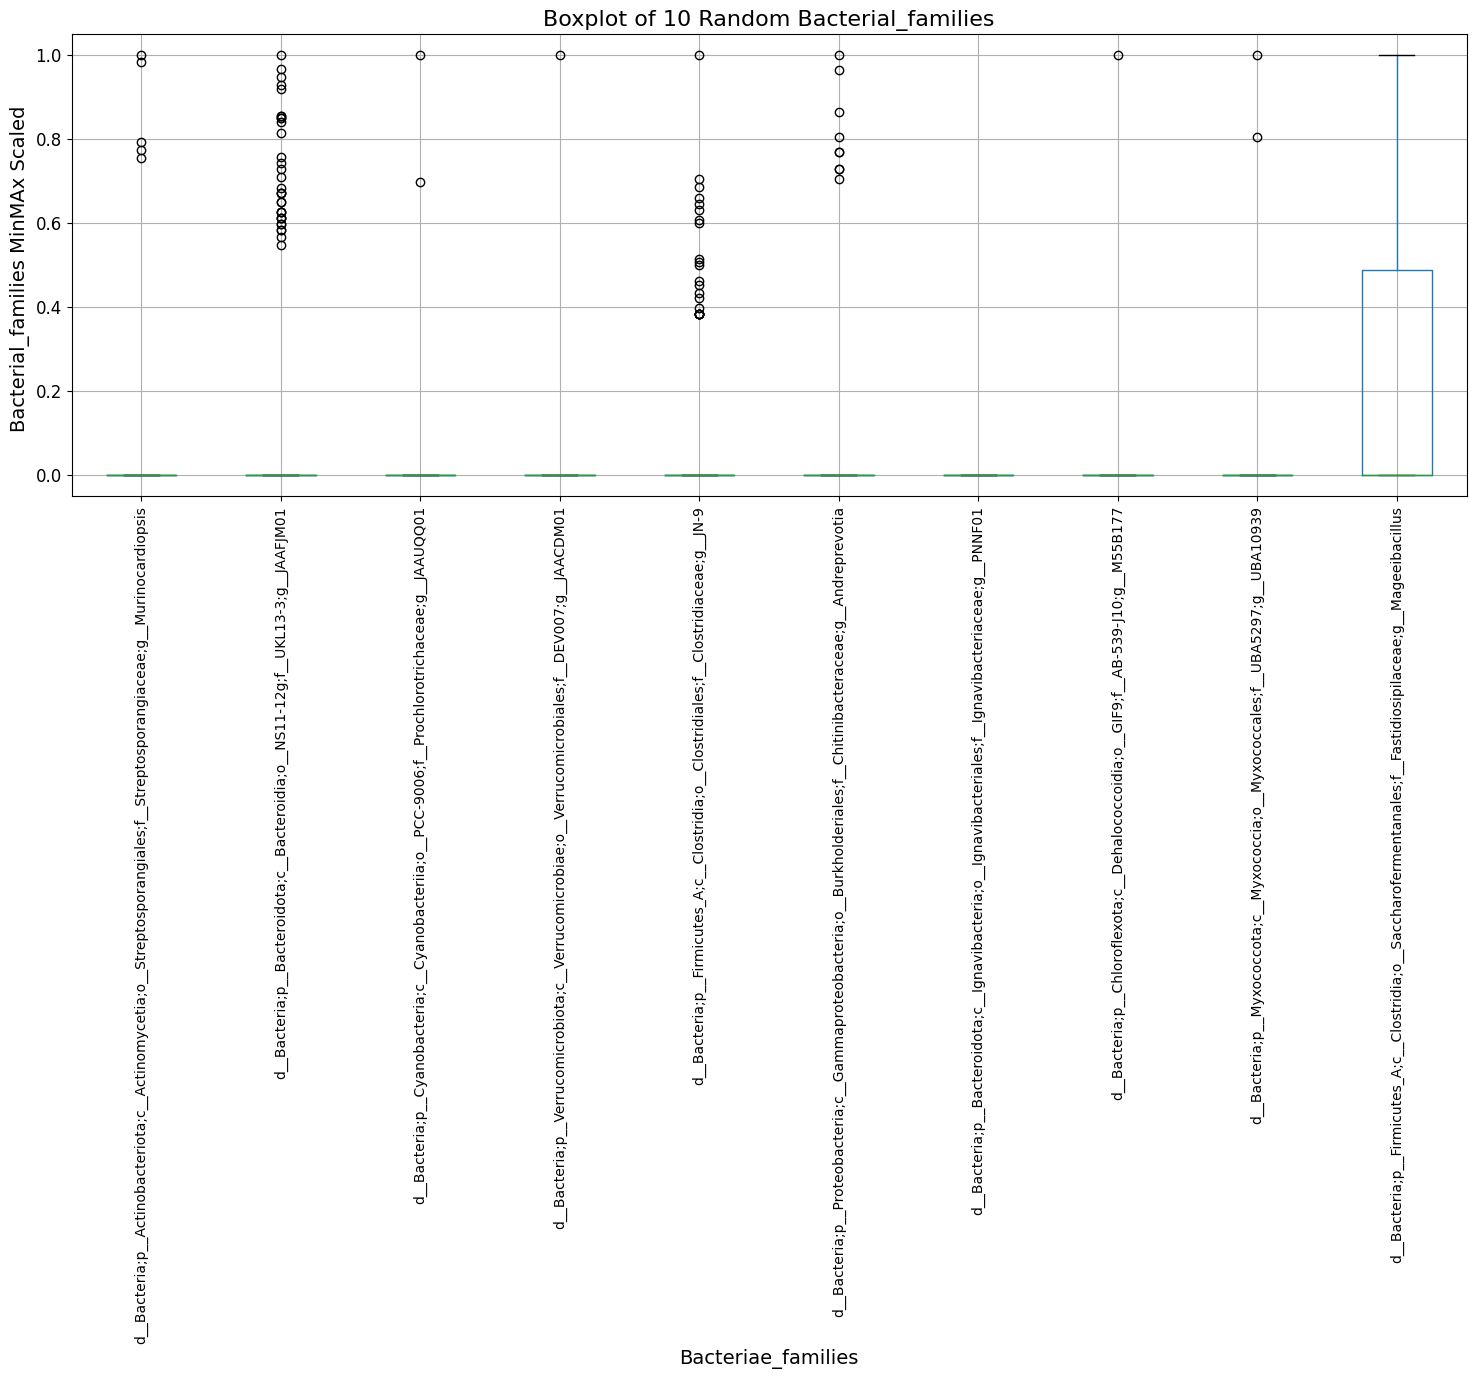

In [24]:
plt.figure(figsize=(18,6)) #set the size of the plot
train_minmax= X_train_minmax.sample(10, axis="columns")
train_minmax.boxplot()
plt.xticks(rotation=90) #rotate the gene names on the x-axis
plt.yticks(fontsize=12)

# Add labels and title
plt.title("Boxplot of 10 Random Bacterial_families", fontsize=16)
plt.xlabel("Bacteriae_families", fontsize=14)
plt.ylabel("Bacterial_families MinMAx Scaled ", fontsize=14)
plt.show()


In [25]:
cls_minmax = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
cls_minmax.fit(X_train_minmax, y_train)
predictions_minmax = cls_minmax.predict(X_test_minmax)


print("Accuracy of MinMax Scaler: {}".format(cls_minmax.score(X_test_minmax,y_test)))
print(classification_report(y_test, predictions_minmax))

Accuracy of MinMax Scaler: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        57
           1       0.64      0.45      0.53        20

    accuracy                           0.79        77
   macro avg       0.73      0.68      0.70        77
weighted avg       0.78      0.79      0.78        77



The accuracy is lower: 79%. This suggests that the MinMaxScaler is not as well as the Normal Logistic Regression model. We might try a non-linear model:

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_non_linear = RandomForestClassifier(random_state=42, n_estimators=100)
model_non_linear.fit(X_train_scaled, y_train)
y_predmnl = model_non_linear.predict(X_test_scaled)

# Evaluate
print("Accuracy of RandomForest:", model_non_linear.score(X_test_scaled, y_test))
print(classification_report(y_test, y_predmnl))



Accuracy of RandomForest: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        57
           1       0.80      0.40      0.53        20

    accuracy                           0.82        77
   macro avg       0.81      0.68      0.71        77
weighted avg       0.82      0.82      0.80        77



An accuracy of 0.81 indicates progress but suggests there is still room for improvement. Since one has already applied logarithmic transformation and standardization, the less high accuracy may be due to other factors such as feature importance, model choice, or underlying dataset properties. So we choose another model to further invetsigate our model and reach optimal performance. Maybe Dimensional Reduction like Principal Component Analysis (PCA) can help: 

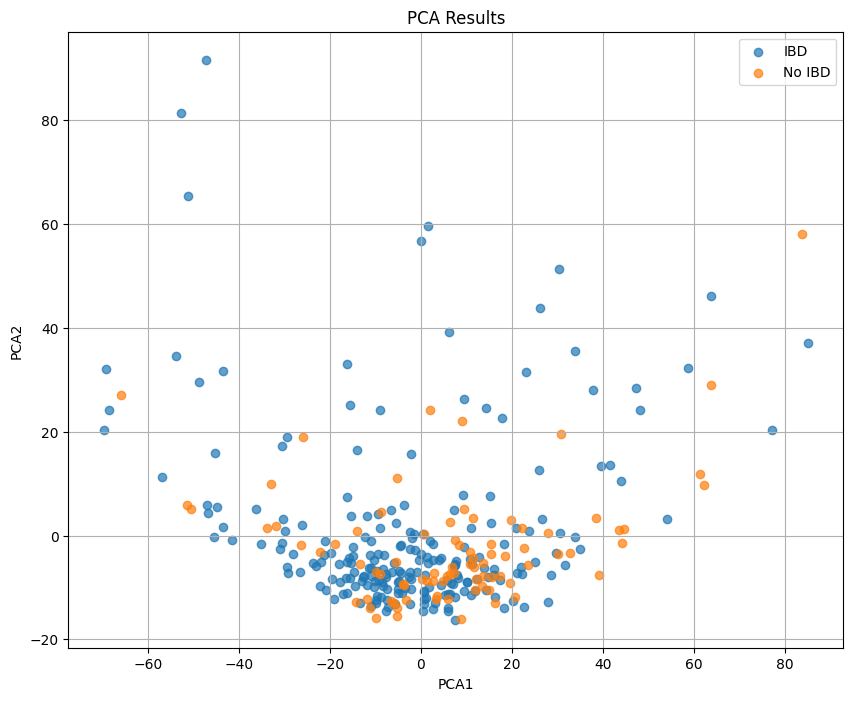

Accuracy: 0.6753246753246753


In [27]:
from sklearn.decomposition import PCA

# Apply PCA (e.g., keeping 2 components for visualization)
pca = PCA(n_components=2)  # Reduce dimensionality to 2
X_pca = pca.fit_transform(X_train_scaled)

# Train a RandomForestClassifier with the reduced data
model_PCA = RandomForestClassifier(random_state=42)
model_PCA.fit(X_pca, y_train)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=["PCA1", "PCA2"])  # Replace pca_result with X_pca
y_train_series = pd.Series(y_train)  # Convert y_train to Pandas Series

# Define group labels
group_labels = {0: "IBD", 1: "No IBD"}

# Map the group labels to Study_Group column
pca_df["IBD_Status"] = y_train_series.map(group_labels)

# Plot PCA results
plt.figure(figsize=(10, 8))
for label, group_name in group_labels.items():
    subset = pca_df[pca_df["IBD_Status"] == group_name]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=group_name, alpha=0.7)

plt.title("PCA Results")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()


# Evaluate the model
y_pred = model_PCA.predict(pca.transform(X_test_scaled))
print("Accuracy:", model_PCA.score(pca.transform(X_test_scaled), y_test))

We see with the PCA_graph and the accuracy-level (67,5%) the PCA might not be helpful for this analysis as it reduces the accuracy. Although, we ca see there's minimal potential to clustering.
Another option might be tSNE-modelling

 Finally, we reduce the dimensionality of the train set from genera_count dataset to just three columns using the t-SNE algorithm.

We first initialize a t-SNE model with perplexity value 10:

In [28]:
from sklearn.manifold import TSNE
model_tSNE = TSNE(n_components=2, perplexity=30)

X_embedded = model_tSNE.fit_transform(X_train_scaled)
X_embedded

array([[-2.40491557e+00, -4.83600664e+00],
       [ 6.06841087e+00,  1.05450783e+01],
       [ 1.64316702e+00,  4.46264744e+00],
       [ 3.11154652e+00, -6.65288353e+00],
       [-5.20983458e+00, -6.37532234e+00],
       [-7.36350346e+00, -6.97015047e+00],
       [-2.82148862e+00,  5.35789537e+00],
       [ 1.23095007e+01,  1.10339756e+01],
       [-9.42218482e-01, -1.88989341e+00],
       [ 1.24493457e-01, -1.05804873e+01],
       [-5.41685867e+00, -9.82796097e+00],
       [-3.36407113e+00, -2.22050023e+00],
       [ 2.78946733e+00, -2.37338996e+00],
       [ 3.07094932e+00, -3.28073883e+00],
       [-7.85382175e+00,  2.83846402e+00],
       [ 1.15677357e+01, -4.01265335e+00],
       [-3.39267349e+00,  1.04288387e+01],
       [-9.45813560e+00,  8.10375977e+00],
       [ 1.69433250e+01,  4.34296221e-01],
       [-1.89104500e+01,  8.82976234e-01],
       [-3.29812980e+00, -9.54430485e+00],
       [-5.41471434e+00,  1.23723722e+00],
       [-3.53050269e-02,  1.09282398e+01],
       [-6.

In [29]:
tsne_result = pd.DataFrame(X_embedded, columns=["t-SNE_1","t-SNE_2"])
tsne_result["IBD_Status"] = y_train
tsne_result

,t-SNE_1,t-SNE_2,IBD_Status
0,-2.404916,-4.836007,0
1,6.068411,10.545078,0
2,1.643167,4.462647,0
3,3.111547,-6.652884,0
4,-5.209835,-6.375322,0
...,...,...,...
300,5.449835,-4.150155,0
301,-9.984664,0.478395,0
302,-6.700385,4.953319,0
303,0.183414,-10.837153,1


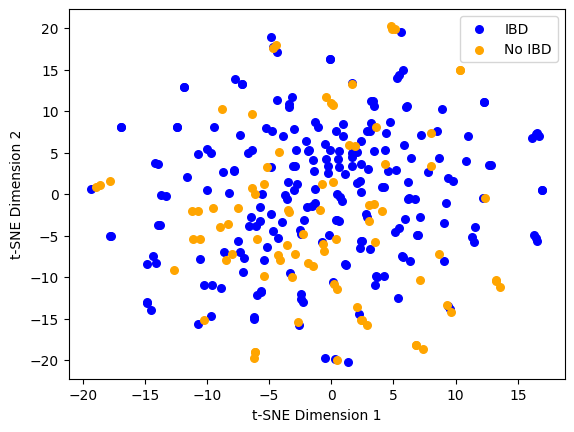

In [30]:
# Assuming tsne_result contains the data and 'Study Group' column indicates the study group labels
fig, ax = plt.subplots()

# Plot the data for each study group (CD, UC, and No IBD)
# Filter data for CD (IBD_Status == 0)
tmp_cd = tsne_result[tsne_result["IBD_Status"] == 0]
ax.scatter(tmp_cd["t-SNE_1"], tmp_cd["t-SNE_2"],c='blue', marker='o', s=30, label="IBD")  # Use 's' for marker size

# Filter data for UC (IBD_Status == 1)
tmp_uc = tsne_result[tsne_result["IBD_Status"] == 1]
ax.scatter(tmp_uc["t-SNE_1"], tmp_uc["t-SNE_2"], c='orange', marker='o', s=30, label="No IBD")

# Add legend, ensuring only one label per group
ax.legend()
ax.set_xlabel("t-SNE Dimension 1")  # X-axis label
ax.set_ylabel("t-SNE Dimension 2") 
# Display the plot
plt.show()

Interpretation: If clusters for different colors overlap significantly, it might suggest that the groups (e.g. IBD and No IBD) share some similarities in the feature Study Group used for the analysis.
If there are distinct separations, it suggests that the groups are different based on the features. Let's calculate the Silhouette score:

In [31]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for the t-SNE-reduced data
sil_score = silhouette_score(tsne_result[["t-SNE_1", "t-SNE_2"]], y_train)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.04388722


This Silhouette Score means our clustering (or dimensionality reduction, in the case of t-SNE) results are very poor or not meaningful.

A last possible model might be the Decision_tree. Let's try this one.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth to prevent overfitting

# Fit the model to the training data
model_dt = dt_classifier.fit(X_train_scaled, y_train)


#Evaluate this model
# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test_scaled)
print("Making predictions for the following 5 bacteriae:")
print(X_test_scaled.columns[:5])
print("The predictions are")
print(y_pred_dt[:5])

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)

# Display a classification report
print(classification_report(y_test, y_pred_dt))






Making predictions for the following 5 bacteriae:
Index(['d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum'],
      dtype='object')
The predictions are
[1 0 0 0 0]
Decision Tree Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        57
           1       0.60      0.30      0.40        20

    accuracy                           0.77        77
   macro avg       0.70      0.61      0.63        77
weighted avg       0.74      0.77      0.74        77


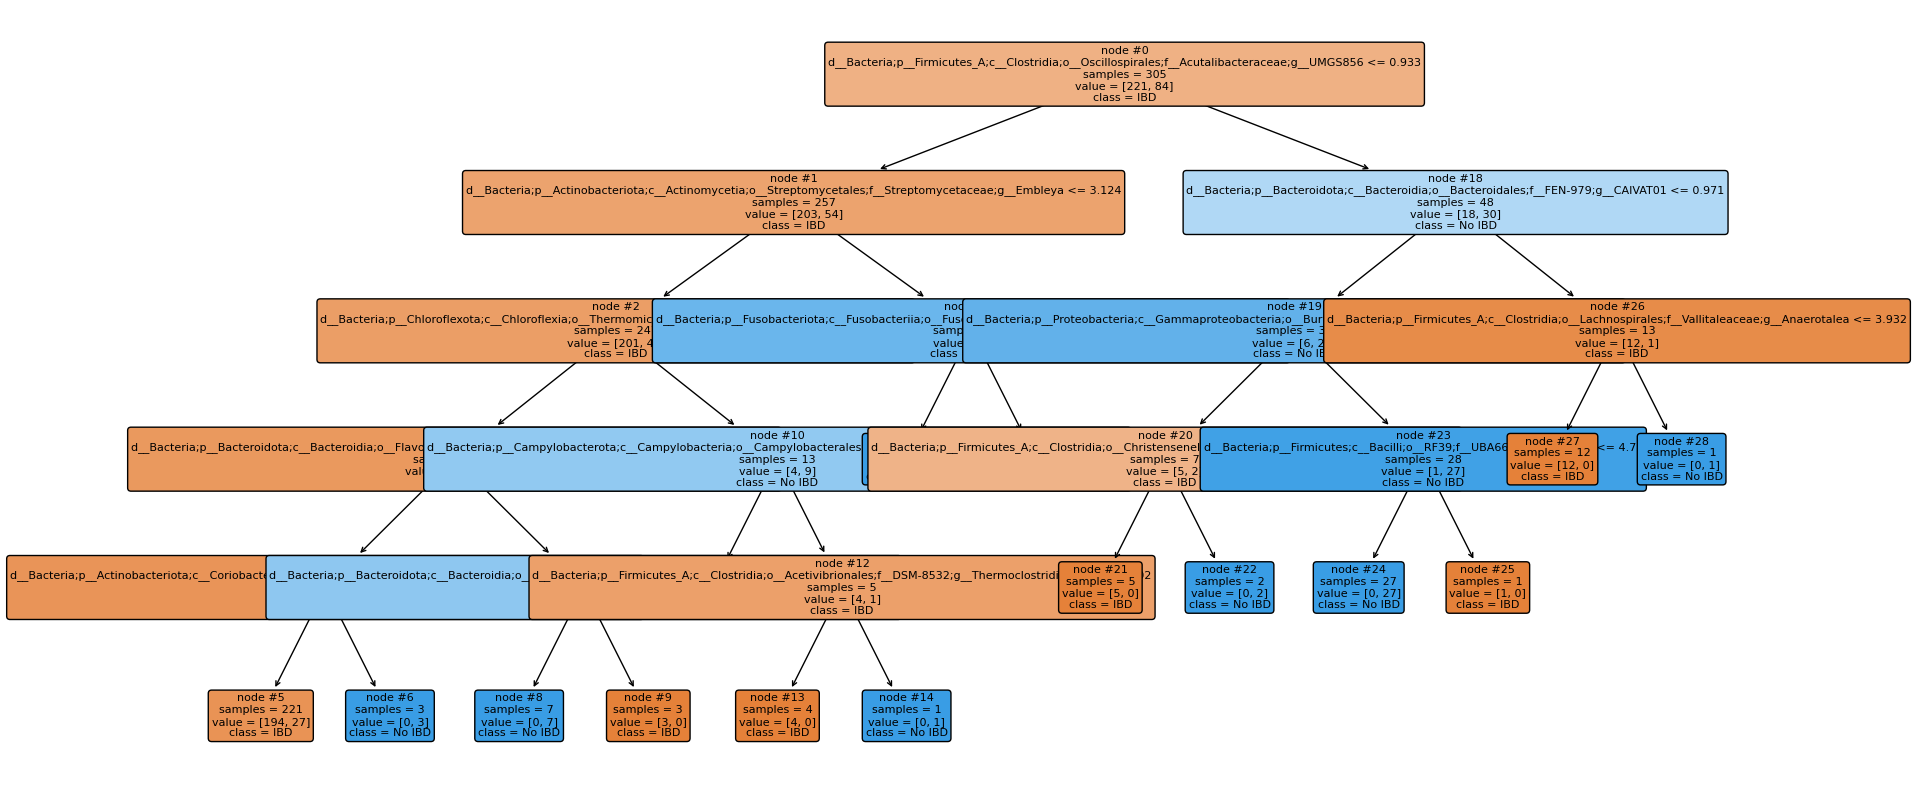

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Set figure size
# Plot the tree with enhanced visualization
plot_tree(
    dt_classifier, 
    feature_names=X_train_scaled.columns,  # Feature names
    class_names=["IBD", "No IBD"],  # Class names
    filled=True,  # Color the nodes
    rounded=True,  # Round the corners of the nodes for better appearance
    fontsize=8,  # Increase font size for readability
    impurity=False,  # Optionally hide impurity values for cleaner view
    node_ids=True  # Show node ids to help trace specific splits
)

# Show plot
plt.show()


So we continue with the LogisticRegression Model which has the highest accuracy with 84%. 

In [34]:

from sklearn.metrics import mean_absolute_error
X_prediction_scaled = cls_std.predict(X_test_scaled)
mean_absolute_error(y_test, X_prediction_scaled)


0.15584415584415584

In summary, an MAE of 0.155 tells you that, on average, your model’s predictions are off by 0.155 units from the true values. We can conclude our Logistic Regression Model is the best working model. 
